In [1]:
import numpy as np
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt

# 1.DataSet

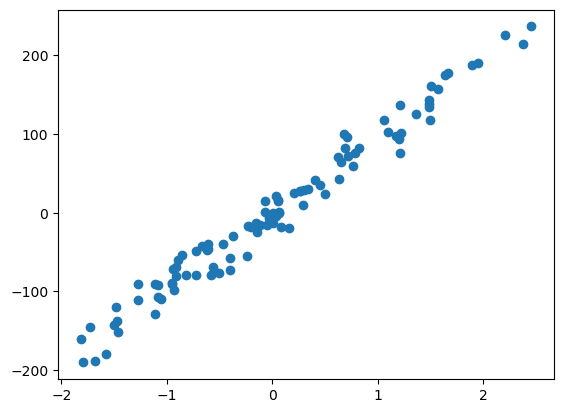

In [61]:
x,y=make_regression(n_samples=100,n_features=2,noise=10)

plt.scatter(x[:,0],y)

In [62]:
print(x.shape)
y=y.reshape(y.shape[0],1)
print(y.shape)

(100, 2)
(100, 1)


In [64]:
#matrice X
X=np.hstack((x,np.ones((x.shape[0],1))))
print(X.shape)
print(X[:10])


(100, 3)
[[-0.60452112  0.14370209  1.        ]
 [ 1.5696933   1.01170704  1.        ]
 [-0.04687807 -1.04642138  1.        ]
 [ 0.65165048  0.87095627  1.        ]
 [ 0.0526705   0.4288591   1.        ]
 [ 2.20687939  0.51569081  1.        ]
 [ 0.71364285  1.87971252  1.        ]
 [ 1.21006901 -2.09268766  1.        ]
 [-0.23009169  0.43677299  1.        ]
 [ 0.68446376  1.45053381  1.        ]]


In [65]:
theta=np.random.randn(3,1)
theta.shape
theta

array([[-0.66746161],
       [-0.45722653],
       [-1.02414357]])

# 2.Modele Lineaire

In [66]:
def model(X,theta):
    return X.dot(theta)

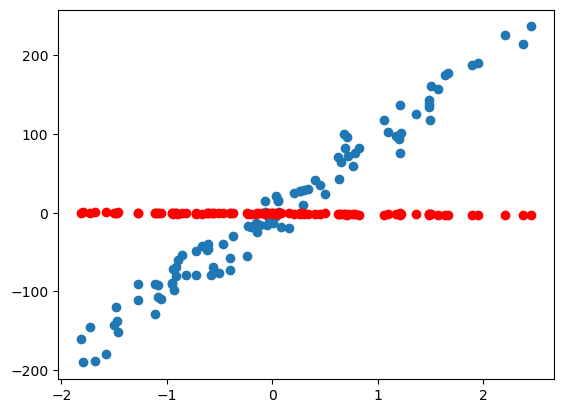

In [80]:
plt.scatter(x[:,0],y)
plt.scatter(x[:,0],model(X,theta),c='r')

# 3.fonction cout

In [69]:
def cost_function(X,y,theta):
    m=len(y)
    return 1/(2*m)*np.sum((model(X,theta)-y)**2)

In [70]:
cost_function(X,y,theta)

5014.729890217663

# 4.Gradients et Descente de Gradient

In [71]:
def grad(X,y,theta):
    m=len(y)
    return 1/m * X.T.dot(model(X,theta)-y)

In [72]:
grad(X,y,theta)

array([[-101.46528854],
       [ -36.47877812],
       [  -4.10560506]])

In [81]:
def gradient_descent(X,y,theta,learning_rate,n_iterations):
    
    cost_history=np.zeros(n_iterations)
    
    for i in range(0,n_iterations):
        theta=theta-learning_rate*grad(X,y,theta)
        cost_history[i]=cost_function(X,y,theta)
    return theta,cost_history

# 5.Entrainement du modele

In [82]:
theta_final,cost_history=gradient_descent(X,y,theta,learning_rate=0.01,n_iterations=1000)

In [83]:
theta_final

array([[91.7406959 ],
       [14.70406711],
       [ 1.16351558]])

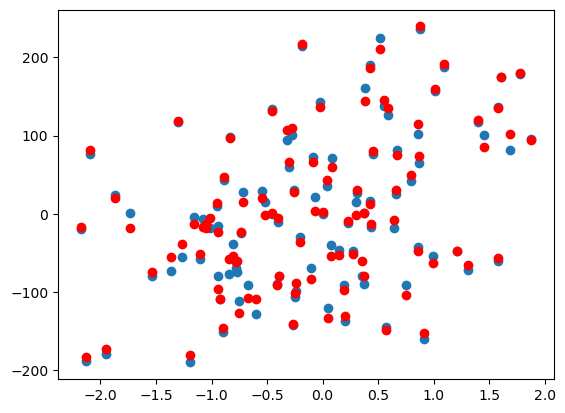

In [84]:
predictions=model(X,theta_final)
plt.scatter(x[:,1],y)
plt.scatter(x[:,1],predictions,c='r')

# 6.Courbe d'apprentissage

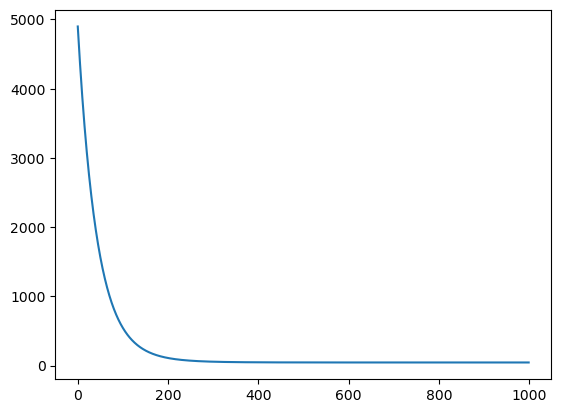

In [85]:
plt.plot(range(1000),cost_history)

In [86]:
def R_squared(y,pred):
    u=((y-pred)**2).sum()
    v=((y-y.mean())**2).sum()
    return 1 - (u/v)

In [87]:
R_squared(y,predictions)

0.9908517240110553